<a href="https://colab.research.google.com/github/semaHbo/ev-enerji-tahmini/blob/main/Model_Training/Ridge_Regression_FeaturePlus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yeni özellikler denenecek

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
train_df = pd.read_csv('/content/drive/MyDrive/ev-enerji-tahmini/train_plus.csv', index_col='date', parse_dates=True)
val_df = pd.read_csv('/content/drive/MyDrive/ev-enerji-tahmini/val_plus.csv', index_col='date', parse_dates=True)

X_train = train_df.drop(columns=['Enerji_Tuketimi'])
y_train = train_df['Enerji_Tuketimi']

X_val = val_df.drop(columns=['Enerji_Tuketimi'])
y_val = val_df['Enerji_Tuketimi']

print("Train:", X_train.shape, "| Val:", X_val.shape)


Mounted at /content/drive
Train: (13813, 34) | Val: (2958, 34)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Ridge Regression (Yeni Özelliklerle) Performansı:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


Ridge Regression (Yeni Özelliklerle) Performansı:
MAE  : 53.5201
MSE  : 8984.6311
RMSE : 94.7873
R²   : 0.1080


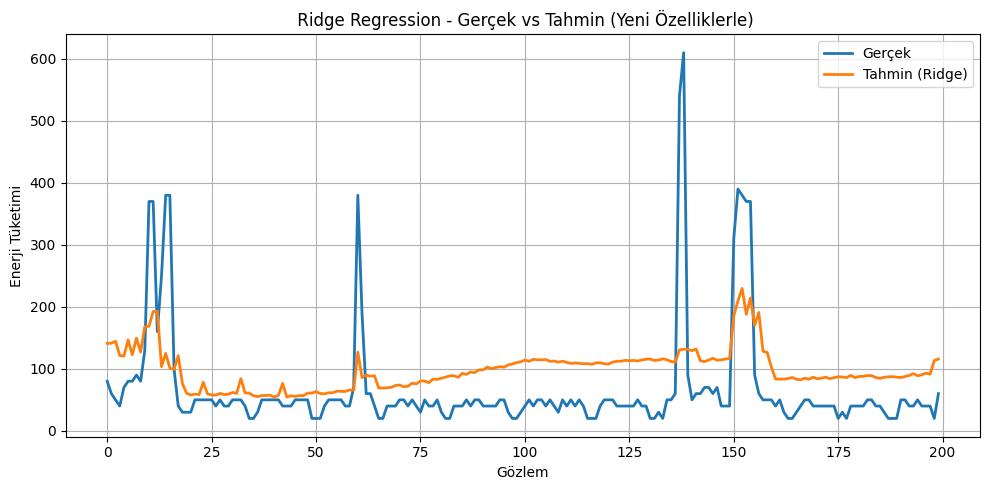

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_val.values[:200], label="Gerçek", linewidth=2)
plt.plot(y_pred[:200], label="Tahmin (Ridge)", linewidth=2)
plt.title(" Ridge Regression - Gerçek vs Tahmin (Yeni Özelliklerle)")
plt.xlabel("Gözlem")
plt.ylabel("Enerji Tüketimi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


yeni özellikler fark yaratmadi